In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

# Reading Location Names

In [4]:
aruba_dataset_path = '/data/dataDeebul/thesis/dataset/strands/aruba/locations.names'

location_names = {}
count = 0
with open(aruba_dataset_path, 'r') as content_file:
    content = content_file.read()
    content = str.splitlines(content)
for count,location in enumerate(content):
    location_names[count] = location
#print(location_names)

{0: 'Master bedroom', 1: 'Master bathroom', 2: 'Living room', 3: 'Kitchen', 4: 'Center', 5: 'Corridor', 6: 'Second bedroom', 7: 'Office', 8: 'Second bathroom', 9: 'Outside'}


# Reading location data

In [9]:
aruba_dataset_path = '/data/dataDeebul/thesis/dataset/strands/aruba/locations.min'

dataset = pd.read_csv(aruba_dataset_path, names=['location', 'time'])
dataset['time'] = dataset.index
dataset['time'] = pd.to_timedelta(dataset['time'], unit='m')
dataset['day'] = (dataset['time']/ np.timedelta64(1, 'D')).astype(int)
dataset['hour'] = (dataset['time']/ np.timedelta64(1, 'h')).astype(int)
dataset['minute'] = (dataset['time']/ np.timedelta64(1, 'm')).astype(int)

def mod_for_hour(row):
    return row['hour'] % 24
dataset['sep_hour'] = dataset.apply(mod_for_hour, axis=1)

def mod_for_minute(row):
    return row['minute'] % 1440
dataset['sep_minute'] = dataset.apply(mod_for_minute, axis=1)

dataset.loc[:,'circular_minute'] = ((dataset.loc[:,'sep_minute']/1440) * 2 * np.pi ) - np.pi
#Renaming location number with their names
for key,value in location_names.items():
    dataset.ix[dataset.location == key, 'location_name'] = value
#dataset.head()


,location,time,day,hour,sep_hour,location_name
0,0,00:00:00,0,0,0,Master bedroom
1,0,00:01:00,0,0,0,Master bedroom
2,0,00:02:00,0,0,0,Master bedroom
3,0,00:03:00,0,0,0,Master bedroom
4,0,00:04:00,0,0,0,Master bedroom


# Reducing the dataset

The ARUBA dataset is a well
Since we have 112 days per minute readings (161280 readings). We will create reduced datasets with the
following assumptions 
- 3 readings every day ( 112 * 3 = 336) 
- 5 readings everyday (112 * 5 = 560) 
- 10 readings everyday (112 * 10 = 1120)

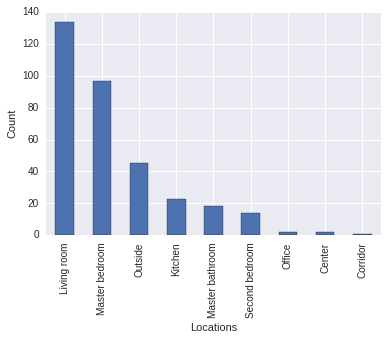

In [8]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
rows = random.sample(list(dataset.index), 336)
reduced_dataset_3readings = dataset.ix[rows]
reduced_dataset_3readings.set_index(np.arange(reduced_dataset_3readings.shape[0]), 
                                    inplace=True)
rows = random.sample(list(dataset.index), 560)
reduced_dataset_5readings = dataset.ix[rows]
reduced_dataset_5readings.set_index(np.arange(reduced_dataset_5readings.shape[0]), 
                                    inplace=True)
rows = random.sample(list(dataset.index), 1120)
reduced_dataset_10readings = dataset.ix[rows]
reduced_dataset_10readings.set_index(np.arange(reduced_dataset_10readings.shape[0]),
                                    inplace=True)

ax = (reduced_dataset_3readings['location_name'].value_counts()).plot(kind='bar')
ax.set_xlabel("Locations")
ax.set_ylabel("Count")